# Introduction
In Part II and III, we visualized and analyzed the two datasets. 

But enough with the visualization, let's proceed to preparing the dataset for modelling.

In this Part, we will do the following:
1. Load the two CSVs as DataFrames
2. Engineer new features in the DataFrames
3. Export the engineered DataFrames as CSVs separately
4. Combine the two engineered DataFrames together
5. Export the combined DataFrame as a CSV

Expect three CSVs from this Part - engineered H1, engineered H2, and engineered H1+H2.

### Step 1: Import library
First step, import pandas as pd.

In [ ]:
# Step 1: Import pandas

### Step 2: Load the CSVs from Part I
As usual, load the two cleaned CSVs that you got at the end of Part I. 

In [ ]:
# Step 2: Load the cleaned CSVs from Part I

### Step 3: Add hasCompany in H1 and H2
Remember our EDA in Part II? We were looking at many columns - Company happened to be one of them.

If we were to dummify the companies directly, we'd have to deal with a lot of new columns that are rather sparse. This reduces generalizability in our model. 

As such, let's engineer a new feature - hasCompany. 

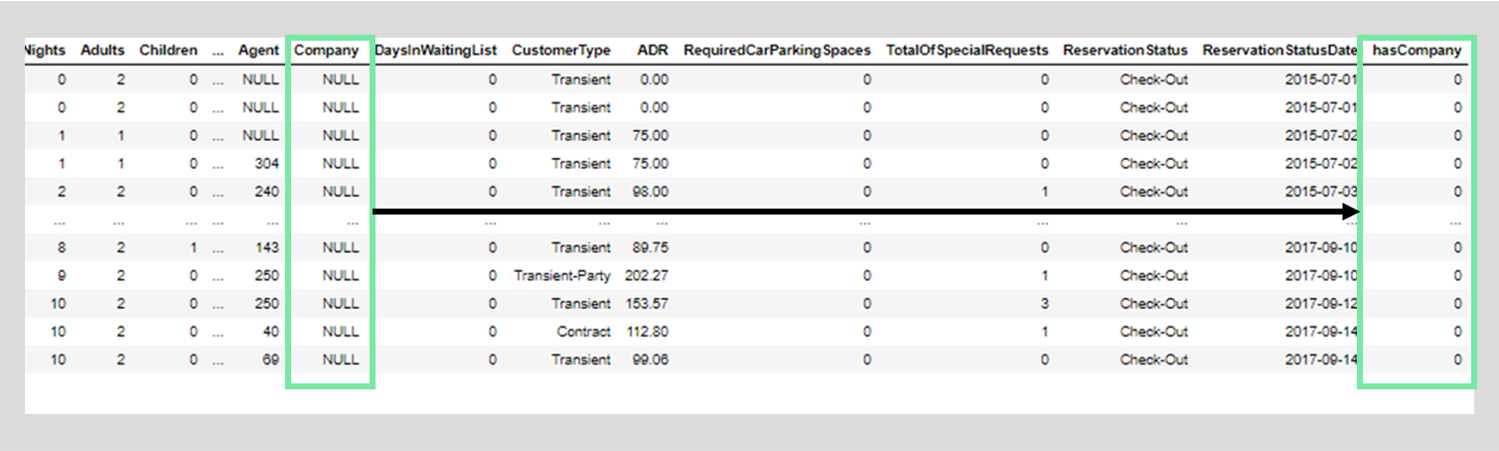

If your booking's row has a 'NULL', the value of hasCompany is 0. On the other hand, if there is any company, the value of hasCompany is 1.

<details>
    <summary><font color = 'green'>Click here once for a hint if you're using a for loop, but getting 1 even though there's cleary a "NULL"</font></summary>
    <div>
        <strong>Are you sure that it's really "NULL"? Assess your assumptions by examining the string closely.</strong>
    </div>
</details>

In [ ]:
# Step 3a: Add hasCompany in H1

In [ ]:
# Step 3b: Add hasCompany in H2

### Step 4: Create hasAgent for H1 and H2
Similarly, we found that there were tons of agents for both quantities, so we can engineer a new column named hasAgent in the DataFrames.

It's a 0 if there are no agents involved, i.e. 'NULL', and 1 if any agent is involved.

In [ ]:
# Step 4a: Create hasAgent for H1

In [ ]:
# Step 4b: Create hasAgent for H2

### Step 5: Create an isPRT column for H1 and H2
When you explored the 'Country' column in Part II, you might have noticed that there are many many many countries, with a majority belonging to 'PRT'. 

From a business point of view, it's important to keep the distinction between domestic/foreign booking (or not), and so we should preserve the information.

To do so, let's create a new column isPRT, where we give a 1 if the booking was made in 'PRT' and 0 if not.

In [ ]:
# Step 5a: Create isPRT for H1

In [ ]:
# Step 5b: Create isPRT for H2

### Step 6: Drop columns from the H1 and H2 DataFrames
There's a few columns in the DataFrame that we can drop for H1 and H2 DataFrames. 
1. <strong>ArrivalDateYear</strong> - we shouldn't take year into consideration because it's not cyclical. Even if we can assume that there's a yearly increase, we don't have enough yearly data to make an informed decision
2. <strong>ArrivalDateDayofMonth</strong> - similar reason as ArrivalDateYear, and there's not enough data to make a case for the day date of the month
3. <strong>ReservationStatus</strong> - strongly correlated with IsCanceled, our dependent variable
4. <strong>ReservationStatusDate</strong>
5. <strong>Agent</strong>
6. <strong>Company</strong>
7. <strong>Country</strong>

The other columns are fine, and will be useful (we think). You should end with 27 columns.

In [ ]:
# Step 6a: Drop the aforementioned columns for H1

In [ ]:
# Step 6b: Drop the aforementioned columns for H2

## Preparing H1 and H2 separately
In this section, we prepare H1 and H2 separately for modelling. Keep the DataFrames from Step 6 and use separate variables for the subsequent parts!

For one-hot encoding/dummification of the categorical values, there are various ways to do it. 

However, no matter which method you do it, make sure you drop one column to avoid the <strong>dummy variable trap</strong>.

For example, if your column contains four categorical values, you'd have to drop one of the four columns after one-hot encoding.

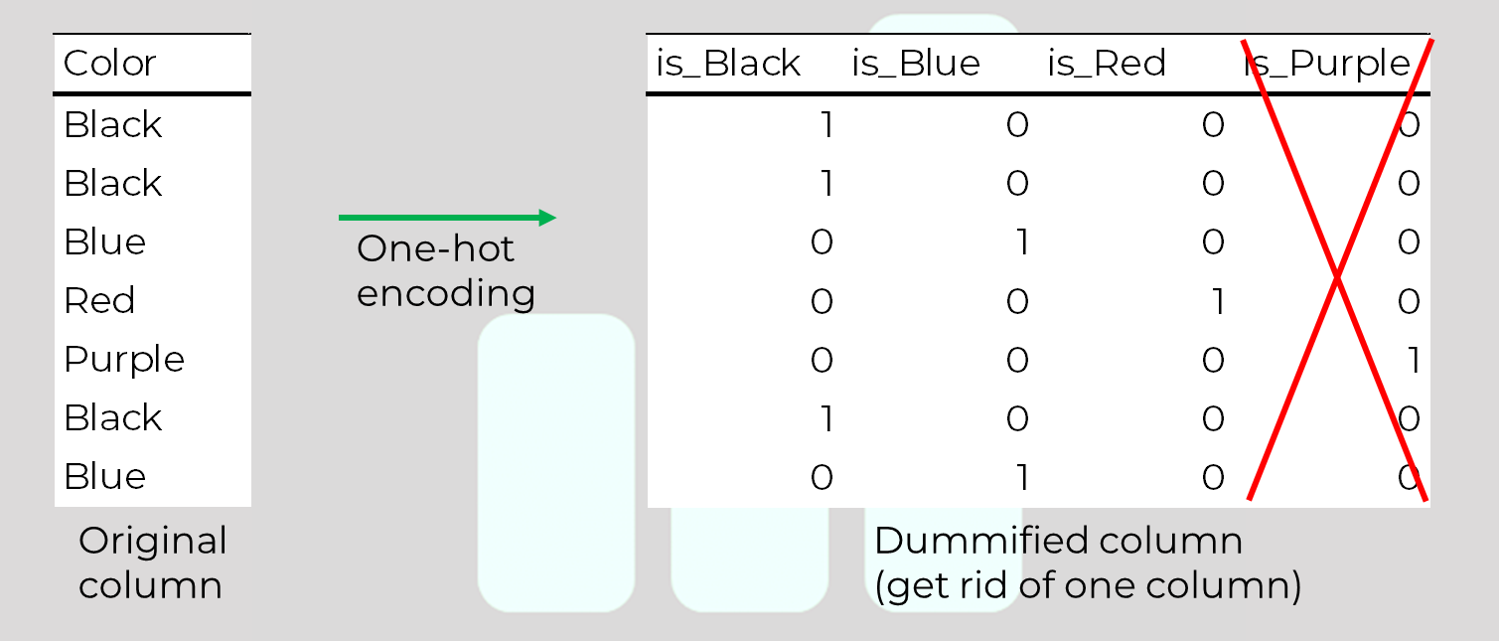

In this example, we drop is_Purple because is_Purple is redundant, i.e. you can infer that row's values based on is_Black, is_Blue, and is_Red. If all of those values are 0, it means the row contains purple instead.

Suggested reading: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Step 7: Dummify H1 categorical data
Let's start with H1 and dummify the categorical columns. 

Declare a new variable, and store the DataFrame containing the dummified columns in it.

Check that you have:
1. 40,060 rows
2. 66 columns

If you don't have the same number of columns, e.g., 74, make sure you <strong>drop</strong> the <strong>first</strong> column after dummification.

In [ ]:
# Step 7: Dummify H1's columns

### Step 8: Dummify H2 categorical data
Similarly, dummify the categorical columns in H2 and store the new DataFrame in a separate variable. 

This time, expect:
1. 79,330 rows
2. 64 columns

In [ ]:
# Step 8: Dummify H2 categorical data

### [Optional] Find the difference between the columns between the dummified H1 and H2
If you're curious why the number of columns is different between the dummified H1 and H2, that's because there are columns in H1 with values that are not found in the corresponding values in H2. 

It's not big deal at this point, since we're dummifying them separately.

However, if your curiousity <em>burns</em>, take a shot and see what are the four columns that are different between the two dummified DataFrames.

In [ ]:
# Optional: Find the difference between the two DataFrames' columns

### Step 9: Export the H1 and H2 dummified DataFrames to CSV
Well done - you've prepared our data for model training. Next step is exporting them into a CSV format.

In [ ]:
# Step 9a: Export dummified H1 to CSV

# Step 9b: Export dummified H2 to CSV


## Preparing H1+H2 dataframe
Ho ho, it's not the end yet. The advantage of having two datasets in this project is that we can combine them into a larger dataset. 

In this section, we'll combine H1 and H2 together and then dummify them before exporting them for modelling in Part V as well. 

### Step 10: Add isResort column to H1 (Step 6)
Remember that H1 came from a resort hotel, whereas H2 came from a city hotel? 

Since we're combining H1 and H2 together, it's important to be able to tell them apart. 

This is because they <em>might</em> contain different distributions in certain columns, which you may or may not have identified through your EDA in Part II.

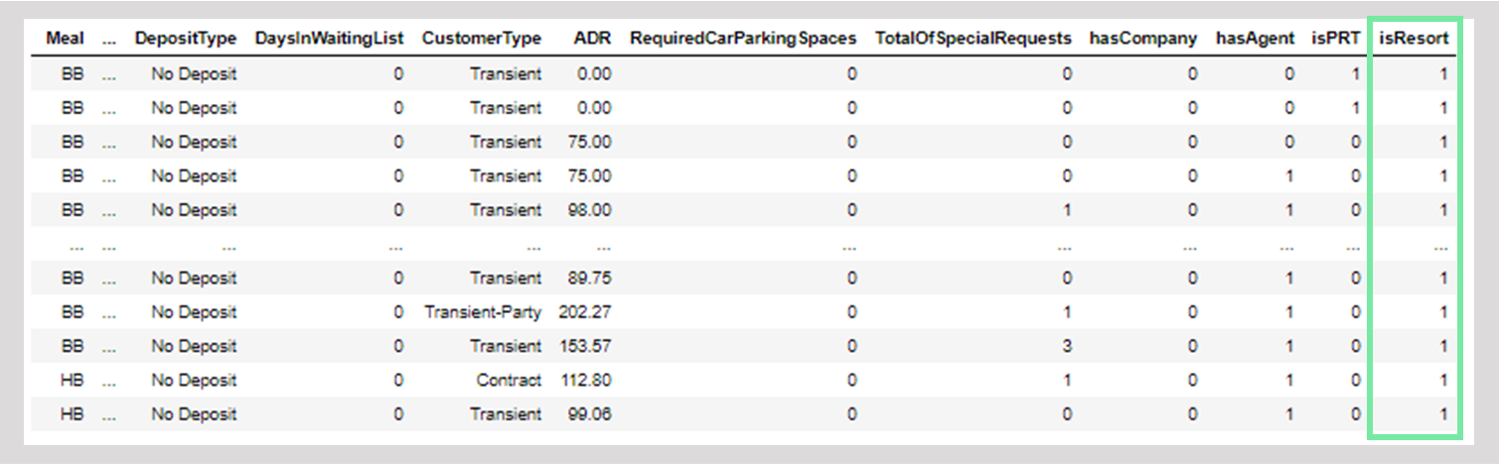

Declare a new variable and add isResort to the H1 DataFrame from Step 6, i.e. H1 that has the seven columns dropped.

Make sure isResort contains only 1 for H1. 

In [ ]:
# Step 10: Add isResort to H1 from Step 6

### Step 11: Repeat 10 for H2 (Step 6)
Now that you've added the new column to H1, do the same to H2 from Step 6.

In [ ]:
# Step 11: Add isResort to H2 from Step 6

### Step 12: Combine H1 (Step 10) and H2 (Step 11) into a single DataFrame
Now that you've added a new column into both H1 and H2, we can combine them safely into a single DataFrame. 

You are expecting a DataFrame with:
1. 119,390 rows
2. 28 columns

Don't forget to <strong>reset</strong> the <strong>index</strong> of the new DataFrame! Make sure you drop the old index as well.

In [ ]:
# Step 12: Combine H1 and H2 together

### Step 13: Dummify the H1+H2 DataFrame
After you get the new combined DataFrame, dummify the categorical values in the columns.

You will get:
1. 119,390 rows
2. 71 columns

In [ ]:
# Step 13: Dummify the combined DataFrame

### Step 14: Export the DataFrame as CSV
Now you're all ready to export the final DataFrame as a CSV file.

Go ahead and export it!

In [ ]:
# Step 14: Export H1+H2 dummified DataFrame as a CSV

### End of Part IV
In this Part, we prepared our datasets for machine learning. We also performed simple feature engineering to simplify complicated categorical columns. 

On top of that, we also combined the two datasets which should make for an interesting modelling exercise in Part V. 